# Salary Estimation using K-Nearest Neighbors (KNN)

## This project uses the K-Nearset Neighbors classification algorithm to predict
## whether a person's salary is [greater than 50K] or [less than 50K] or [equal to 50K] based 
## on various personal and professional features.

### I perform the following steps
### - Load and explore the dataset
### - convert categorical labels to numeric
### - preprocess and scale features
### - find the best value for K
### - train and evaluate a KNN classifier                     


# Step 1- Import Libraries
### I importing necessary python libraries for data handling, visualization, and model building

In [19]:
import pandas as pd  #useful for loading the dataset
import numpy as np  #to perform array

#  Step 2- Load Dataset
### load the dataset using pandas .The data set contains demographic and work related information along with a salary label.

In [20]:
dataset = pd.read_csv(r"C:\Users\Shehan\Downloads\salary.csv")
dataset

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K
...,...,...,...,...,...
32556,22,10,0,40,<=50K
32557,27,12,0,38,<=50K
32558,40,9,0,40,>50K
32559,58,9,0,40,<=50K


# Step 3- explore the Dataset
### check the shape, preview the top rows ,and print information about data types and missing values.

In [21]:
print(dataset.shape)
print(dataset.head(5))
print(dataset.info())

(32561, 5)
   age  education.num  capital.gain  hours.per.week income
0   90              9             0              40  <=50K
1   82              9             0              18  <=50K
2   66             10             0              40  <=50K
3   54              4             0              40  <=50K
4   41             10             0              40  <=50K
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   education.num   32561 non-null  int64 
 2   capital.gain    32561 non-null  int64 
 3   hours.per.week  32561 non-null  int64 
 4   income          32561 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.2+ MB
None


# Step 4- Encode the target column
### convert the target variable 'income' from text to binary
### <=50K become 0
### >50K become 1

In [22]:
income_set = set(dataset['income'])
dataset['income'] = dataset['income'].map({'<=50K': 0, '>50K': 1}).astype(int)
print(dataset.head())

   age  education.num  capital.gain  hours.per.week  income
0   90              9             0              40       0
1   82              9             0              18       0
2   66             10             0              40       0
3   54              4             0              40       0
4   41             10             0              40       0


# Step 5- Split Features and Target
### separate the input features ('X') from the output label ('y') for training the model

In [23]:
X = dataset.iloc[:, :-1].values
X


array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]], dtype=int64)

In [24]:
y = dataset.iloc[:, -1].values
y

array([0, 0, 0, ..., 1, 0, 0])

# Step6 -Splitting Dataset into Train & Test
### use 80/20 train-test split to evaluate model performance fairly

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Step 7- Feature Scaling
### KNN is a distance based algorithm. so i scale the fearures using 'standardscaler' to ensure all values are on the same scale

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Step 8 - Find the Best K-Value
### test different K values fro 1 to 49 and plot the error rate to identify the K that gives the lowest prediction error

Text(0, 0.5, 'Mean error')

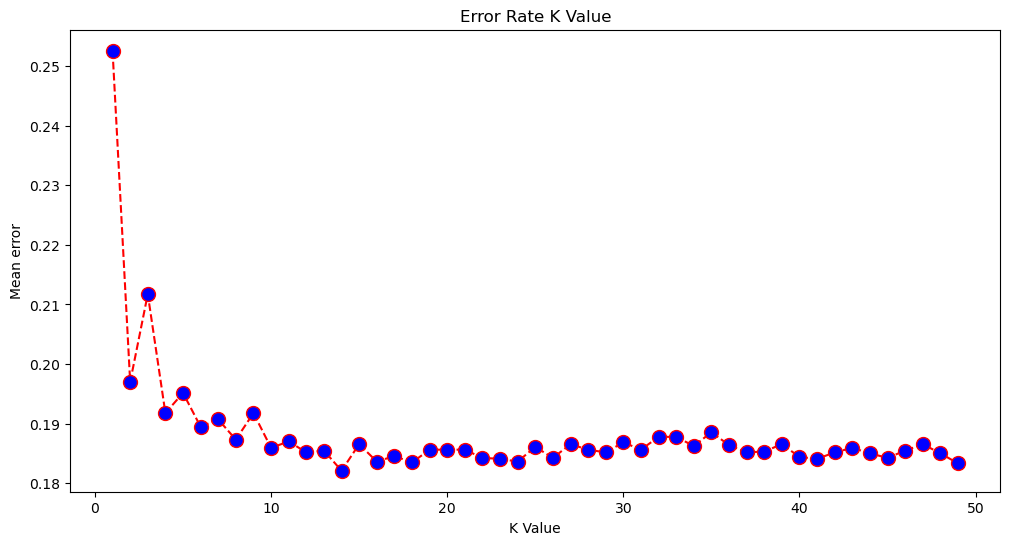

In [30]:
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Calculating error for K values between 1 and 50
for i in range(1,50):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    pred_i = model.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize = (12,6))
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',
        markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean error')

# Step 9- Train the  final Model
### train the KNN model with the best K value , using the Minkowski distance (which include Exclidean distance when p=2)

In [61]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 14, metric = "minkowski", p =2)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=14)

# Step10 - Prediction for all Test Data and Compare
### use the trained model to predict salary class labels for the test set and print a comparision of prediction

In [67]:
import numpy as np
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


# Step 11- Evaluating Model

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

print('Confusion Matrix: ')
print(cm)

print('Accuracy of the Model: {0}%'.format(accuracy_score(y_test, y_pred)*100))

Confusion Matrix: 
[[4701  265]
 [ 921  626]]
Accuracy of the Model: 81.79026562260096%


#  Final Conclusion
### Best K value = 14 (based on lowest error)
### Final Model Accuracy = 81.79%
### KNN performed well on this dataset after scaling and tuning

# StepPredicting, wheather new employee with Age & Salary will Buy or Not

In [69]:
age = int(input("Enter New Employee's Age: "))
edu = int(input("Enter New Employee's Education: "))
cg = int(input("Enter New Employee's Gain: "))
wh = int(input("Enter New Employee's Hour's Per Week: "))
newEmp = [age,edu,cg,wh]
newEmp = np.array(newEmp).reshape(1,-1)
result = model.predict(sc.transform(newEmp))
print(result)

if result == 1:
    print("Employee might got Salary above 50K")
else:
    print("Employee  might not got Salary above  50K")

Enter New Employee's Age:  30
Enter New Employee's Education:  10
Enter New Employee's Gain:  0
Enter New Employee's Hour's Per Week:  40


[0]
Employee  might not got Salary above  50K
